### More Important Functions

In [ ]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index -> rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
dtype: int64

In [ ]:
# value_counts(series and dataframe)


marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [ ]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
dtype: int64

In [ ]:
ipl = pd.read_csv('ipl-matches.csv')
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar    1
BCJ Cutting

In [ ]:
# find which player has won most potm -> in finals and qualifiers

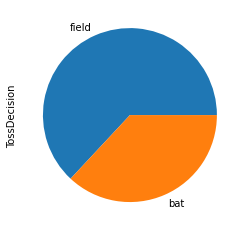

In [ ]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
# AP Code
ipl['TossDecision'].value_counts()

field    599
bat      351
Name: TossDecision, dtype: int64

In [ ]:
ipl['TossDecision_Bat'] = ipl['TossDecision'] == 'bat'
ipl['TossDecision_Field'] = ipl['TossDecision'] == 'field'

ipl_toss_venue_counts = ipl[['Venue', 'TossDecision_Bat', 'TossDecision_Field']].groupby('Venue').sum()
ipl_toss_venue_counts['TossDecision_TotalCounts'] = ipl_toss_venue_counts['TossDecision_Bat'] + ipl_toss_venue_counts['TossDecision_Field']
ipl_toss_venue_counts['TossDecision_Bat%'] = (ipl_toss_venue_counts['TossDecision_Bat']/ipl_toss_venue_counts['TossDecision_TotalCounts'])*100
ipl_toss_venue_counts['TossDecision_Field%'] = (ipl_toss_venue_counts['TossDecision_Field']/ipl_toss_venue_counts['TossDecision_TotalCounts'])*100

In [ ]:
ipl_toss_cmpr = ipl_toss_venue_counts['TossDecision_Bat%'] > ipl_toss_venue_counts['TossDecision_Field%']
ipl_toss_venue_counts['Pred'] = ipl_toss_cmpr.apply(lambda x: 'Field' if not x else 'Bat')

In [ ]:
ipl_toss_venue_counts['Pred']

Venue
Arun Jaitley Stadium                                    Field
Arun Jaitley Stadium, Delhi                             Field
Barabati Stadium                                        Field
Brabourne Stadium                                         Bat
Brabourne Stadium, Mumbai                               Field
Buffalo Park                                              Bat
De Beers Diamond Oval                                     Bat
Dr DY Patil Sports Academy                              Field
Dr DY Patil Sports Academy, Mumbai                      Field
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     Field
Dubai International Cricket Stadium                     Field
Eden Gardens                                            Field
Eden Gardens, Kolkata                                   Field
Feroz Shah Kotla                                        Field
Green Park                                              Field
Himachal Pradesh Cricket Association Stadium            Field
Ho

In [ ]:
# how many matches each team has played
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [ ]:
# AP COde
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [ ]:
# sort_values(series and dataframe) -> ascending -> na_position -> inplace -> multiple cols

In [ ]:
x = pd.Series([12,14,1,56,89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [ ]:
x.sort_values(ascending=False)

4    89
3    56
1    14
0    12
2     1
dtype: int64

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head(4)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)


In [ ]:
movies.sort_values('title_x',ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [ ]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.sort_values('name',na_position='first',ascending=False,inplace=True)

In [ ]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [ ]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [ ]:
# rank(series)
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [ ]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [ ]:
# sort_index(series and dataframe)

In [ ]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [ ]:
ipl.sort_index(ascending=False)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,TossDecision_Bat,TossDecision_Field
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,False,True
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,True,False
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,True,False
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,True,False
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,True,False
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,False,True
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,False,True
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,False,True


In [ ]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [ ]:
# set_index(dataframe) -> inplace
batsman.set_index('batter',inplace=True)

In [ ]:
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [ ]:
# reset_index(series + dataframe) -> drop parameter
batsman.reset_index(inplace=True)

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [ ]:
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [ ]:
# how to replace existing index without loosing
batsman.reset_index().set_index('batting_rank')

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [ ]:
# series to dataframe using reset_index
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [ ]:
# rename(dataframe) -> index

In [ ]:
movies.set_index('title_x',inplace=True)

In [ ]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)

In [ ]:
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'})

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [ ]:
# unique(series)
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64


In [ ]:
len(temp.unique())

6

In [ ]:
temp.nunique()

5

In [ ]:
len(ipl['Season'].unique())

15

In [ ]:
# nunique(series + dataframe) -> does not count nan -> dropna parameter
ipl['Season'].nunique()

15

In [ ]:
# isnull(series + dataframe)
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [ ]:
# notnull(series + dataframe)
students['name'][students['name'].notnull()]

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [ ]:
# hasnans(series)
students['name'].hasnans

True

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.isnull()

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


In [ ]:
students.notnull()

,name,college,branch,cgpa,package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


In [ ]:
# dropna(series + dataframe) -> how parameter -> works like or
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.dropna(how='any')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [ ]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.dropna(subset=['name'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [ ]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [ ]:
students.dropna(inplace=True)

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
# fillna(series + dataframe)
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [ ]:
students['name'].fillna(method='bfill')

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

In [ ]:
# drop_duplicates(series + dataframe) -> works like and -> duplicated()

In [ ]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [ ]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [ ]:
# find the last match played by virat kohli in Delhi
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,TossDecision_Bat,TossDecision_Field,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,True,False,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,False,True,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,False,True,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,False,True,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,True,False,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ..."


In [ ]:
'V Kohli' in ipl['Team1Players'][949]

True

In [ ]:
ipl['all_players'].apply(lambda x: 'V Kohli' in x)

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: all_players, Length: 950, dtype: bool

In [ ]:
ipl['Kohli_Play']

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: Kohli_Play, Length: 950, dtype: bool

In [ ]:
def did_kohli_play(players_list):
  return 'V Kohli' in players_list

In [ ]:
ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)].drop_duplicates(subset=['City','did_kohli_play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [ ]:
students.drop_duplicates()

In [ ]:
# drop(series + dataframe)
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [ ]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [ ]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.drop(columns=['branch','cgpa'],inplace=True)

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [ ]:
students.set_index('name').drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN


In [ ]:
# apply(series + dataframe)
temp = pd.Series([10,20,30,40,50])

temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [ ]:
def sigmoid(value):
  return 1/1+np.exp(-value)

In [ ]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [ ]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [ ]:
def euclidean(row):
  pt_A = row['1st point']
  pt_B = row['2nd point']

  return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

In [ ]:
points_df['distance'] = points_df.apply(euclidean,axis=1)
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000


In [ ]:
# isin(series)

In [ ]:
# corr

In [ ]:
# nlargest and nsmallest(series and dataframe)

In [ ]:
# insert(dataframe)


In [ ]:
# copy(series + dataframe)